## K-means Algorithm

K-Means falls under the category of centroid-based clustering. A centroid is a data point (imaginary or real) at the center of a cluster. In centroid-based clustering, clusters are represented by a central vector. This centroid might not necessarily be a member of the dataset. Centroid-based clustering is an iterative algorithm in which the notion of similarity is derived by how close a data point is to the centroid of the cluster.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("/content/Mall_Customers.csv")

df.head(3)

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6

In [3]:
len(df)

200

In [4]:
#Select the annual income and the spending score columns
x = df.iloc[:, [3,4]].values
x[0:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

We actually do not know the number of clusters. There are several methods to select k that depends on the domain knowledge and rule of thumbs. Elbow method is one of the robust one used to find out the optimal number of clusters. In this method, the sum of distances of observations from their cluster centroids, called Within-Cluster-Sum-of-Squares (WCSS). This is computed as

Yi is centroid for observation xi. The below code performs this method.

In [5]:
# kmeans class from sklearn lib
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state=0 )
kmeans.n_clusters

5

We are going to use the fit predict method that returns for each #observation which cluster it belongs to.

The cluster to which #client belongs and it will return this cluster numbers into a #single vector that is called y_kmeans

In [6]:
y_kmeans = kmeans.fit_predict(x)
type(y_kmeans)

numpy.ndarray

In [7]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [8]:
df['cluster'] = y_kmeans
df.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   cluster  
0        4  
1        3  
2        4  
3        3  
4        4

In [9]:
print(y_kmeans.shape)
print(y_kmeans.dtype)

(200,)
int32


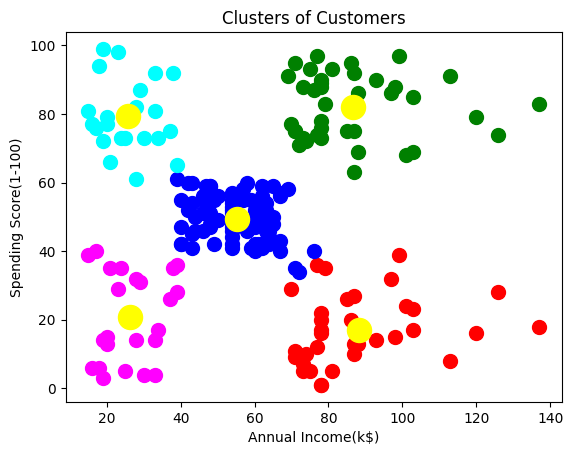

In [10]:
# Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

# Plot the centroid. Using the cluster centres
# attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

Ultimately, we can define these clusters according to their annual income and spending scores. For instance, Cluster1 has high annual income and low spending score so that we can name it “Careful” and name the others in comparison with this appellation. If you are doing clustering in more than two dimensions you don’t execute the last code section to visualize the clusters because it’s only for two-dimensional clustering. It is possible to use this code by using the dimension reduction technique. So if you reduce the dataset to two dimensions by these techniques then you can use this last code section to plot the cluster